# car model

Let's start with some basic modeling, now that we actually have some data out of the way.

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import pandas as pd
from birdcall_distribution.geo import (
    get_shape_us_state,
    generate_grid,
    add_lonlat_columns,
    generate_grid_adjaceny_list,
    CA_EXTENT,
    get_adjacency_mapping,
    convert_to_adjacency_matrix,
)

grid_size = (0.25, 0.25)
ca_shape = get_shape_us_state("California")
grid = generate_grid(ca_shape, CA_EXTENT, grid_size)
adjacency_list = generate_grid_adjaceny_list(grid)
mapping = get_adjacency_mapping(adjacency_list)
W = convert_to_adjacency_matrix(adjacency_list)

In [98]:
from birdcall_distribution.utils import convert_time

df = pd.read_csv("../data/raw/birdclef-2022/train_metadata.csv")
df["hour"] = df.time.apply(convert_time)
df = df[["primary_label", "latitude", "longitude", "hour"]].dropna()
df = add_lonlat_columns(df, grid)
df = df[df.grid.notnull()]
df["adjacency_idx"] = df.grid_id.apply(lambda x: mapping.get(x, None))
df

,primary_label,latitude,longitude,hour,grid_id,grid,adjacency_idx
51,amewig,35.0307,-120.6205,9.500000,-120.75_35.0,"POLYGON ((-120.75 35, -120.5 35, -120.5 35.25,...",454
56,amewig,32.5640,-117.1256,9.900000,-117.25_32.5,"POLYGON ((-117.25 32.5, -117 32.5, -117 32.75,...",152
57,amewig,32.5640,-117.1256,10.250000,-117.25_32.5,"POLYGON ((-117.25 32.5, -117 32.5, -117 32.75,...",152
58,amewig,32.5640,-117.1256,10.883333,-117.25_32.5,"POLYGON ((-117.25 32.5, -117 32.5, -117 32.75,...",152
59,amewig,32.5640,-117.1256,10.750000,-117.25_32.5,"POLYGON ((-117.25 32.5, -117 32.5, -117 32.75,...",152
...,...,...,...,...,...,...,...
14652,wiltur,33.1349,-116.8522,10.850000,-117.0_33.0,"POLYGON ((-117 33, -116.75 33, -116.75 33.25, ...",136
14655,wiltur,35.2530,-120.8760,14.016667,-121.0_35.25,"POLYGON ((-121 35.25, -120.75 35.25, -120.75 3...",484
14656,wiltur,32.8706,-116.4247,5.450000,-116.5_32.75,"POLYGON ((-116.5 32.75, -116.25 32.75, -116.25...",102
14660,wiltur,38.5321,-121.0686,5.633333,-121.25_38.5,"POLYGON ((-121.25 38.5, -121 38.5, -121 38.75,...",525


In [97]:
ee_df = pd.read_parquet("../data/earth_engine.parquet")
ee_df

,name,total_pixels,elevation_mean,elevation_min,elevation_max,day_temp_mean,day_temp_min,day_temp_max,night_temp_mean,night_temp_min,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
0,-124.5_40.0,136,19.191799,0,603,20.218264,15.569330,23.008962,11.368067,10.211949,...,0.078431,0.039216,0.032680,0.006536,0.006536,0.006536,0.006536,0.006536,0.006536,0.686275
1,-124.5_40.25,474,149.579082,0,835,18.502147,11.282973,24.777535,9.836830,7.891062,...,0.085540,0.101833,0.030550,0.006110,0.002037,0.002037,0.002037,0.002037,0.002037,0.362525
2,-124.5_40.5,421,38.093112,-2,645,15.821732,11.407486,20.084343,8.120768,6.343226,...,0.036530,0.038813,0.084475,0.020548,0.002283,0.002283,0.002283,0.002283,0.002283,0.618721
3,-124.25_39.75,117,1.179847,0,488,15.392123,14.029692,16.968766,11.172921,10.688841,...,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.873134
4,-124.25_40.0,511,277.559524,0,1085,19.006655,13.470183,24.122592,11.361455,9.681276,...,0.017045,0.001894,0.001894,0.018939,0.001894,0.001894,0.001894,0.001894,0.001894,0.261364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,-114.5_34.0,642,196.793367,98,607,38.105495,31.176378,42.030295,17.193113,14.073062,...,0.001517,0.003035,0.033384,0.001517,0.153263,0.010622,0.001517,0.001517,0.593323,0.001517
767,-114.5_34.25,622,405.715608,136,1099,35.530803,21.568142,41.116534,18.896735,16.326429,...,0.001565,0.001565,0.028169,0.001565,0.001565,0.046948,0.001565,0.001565,0.593114,0.034429
768,-114.5_34.5,604,335.788265,136,1018,36.509852,25.131747,40.549440,18.795195,16.373301,...,0.001610,0.001610,0.032206,0.001610,0.001610,0.014493,0.001610,0.001610,0.487923,0.006441
769,-114.25_34.0,645,299.934949,117,658,39.580588,35.338905,42.290031,18.505028,16.028932,...,0.001511,0.001511,0.051360,0.001511,0.001511,0.006042,0.001511,0.001511,0.583082,0.001511


Now let's build our first model. We will create a logistic regression with CAR without any exogenous terms.
Our exogneous factors include landcover (which we will attempt to model as a categorical prior), temperature, and elevation.

In [32]:
# create counts for each adjacency index
import numpy as np
import pymc as pm
import arviz as az

In [159]:
# count number of observed calls per adjacency index, and join against the ee variables

counts_df = df.grid_id.value_counts().reset_index()
counts_df.columns = ["grid_id", "y"]
prep_df = counts_df.merge(
    ee_df.rename(columns={"name": "grid_id"}), on="grid_id", how="outer"
)
prep_df["adjacency_idx"] = prep_df.grid_id.apply(lambda x: mapping.get(x, None))
prep_df = prep_df.set_index("adjacency_idx").sort_index()
prep_df

,grid_id,y,total_pixels,elevation_mean,elevation_min,elevation_max,day_temp_mean,day_temp_min,day_temp_max,night_temp_mean,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
adjacency_idx,,,,,,,,,,,,,,,,,,,,,
0,-114.25_34.0,NaN,645,299.934949,117,658,39.580588,35.338905,42.290031,18.505028,...,0.001511,0.001511,0.051360,0.001511,0.001511,0.006042,0.001511,0.001511,0.583082,0.001511
1,-114.25_34.25,11.0,642,400.443122,125,814,36.477926,26.039213,39.694527,19.026086,...,0.001517,0.001517,0.091047,0.001517,0.001517,0.004552,0.001517,0.001517,0.107739,0.010622
2,-114.5_32.75,4.0,652,129.812169,42,388,37.743856,28.135905,41.715545,18.323080,...,0.001495,0.007474,0.095665,0.004484,0.029895,0.010463,0.001495,0.001495,0.657698,0.005979
3,-114.5_33.5,NaN,649,281.244898,83,741,37.156411,31.041839,41.692120,18.296156,...,0.001502,0.001502,0.015015,0.001502,0.016517,0.001502,0.001502,0.001502,0.834835,0.001502
4,-114.5_33.75,1.0,646,168.725765,88,386,37.222819,31.051061,41.779436,16.969324,...,0.001508,0.001508,0.021116,0.001508,0.315234,0.001508,0.001508,0.001508,0.559578,0.001508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,-124.25_41.75,NaN,579,207.669643,-3,774,17.244983,11.934333,21.336143,9.212537,...,0.033557,0.008389,0.036913,0.001678,0.006711,0.016779,0.001678,0.001678,0.001678,0.167785
767,-124.25_42.0,NaN,557,390.306122,0,1046,19.899230,15.922079,25.720772,10.425783,...,0.012195,0.006969,0.003484,0.001742,0.001742,0.003484,0.001742,0.001742,0.001742,0.012195
768,-124.5_40.0,NaN,136,19.191799,0,603,20.218264,15.569330,23.008962,11.368067,...,0.078431,0.039216,0.032680,0.006536,0.006536,0.006536,0.006536,0.006536,0.006536,0.686275


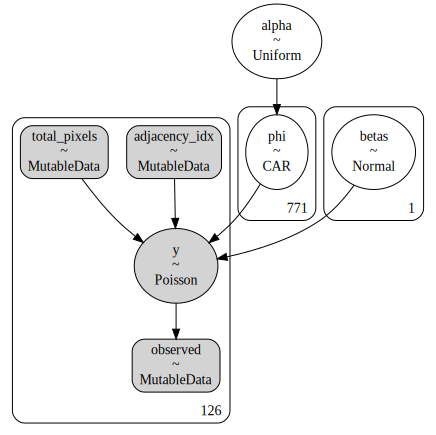

In [164]:
model_df = prep_df[prep_df.y.notnull()]

with pm.Model() as simple_model:
    # create a masked array with observed counts
    observed = pm.MutableData("observed", model_df.y.values)
    adjacency_idx = pm.MutableData("adjacency_idx", model_df.index.values)
    total_pixels = pm.MutableData("total_pixels", model_df.total_pixels.values)

    # spatial adjustments
    alpha = pm.Uniform("alpha", 0, 1)
    phi = pm.CAR("phi", mu=np.zeros(W.shape[0]), tau=1e-5, alpha=alpha, W=W)
    betas = pm.Normal("betas", mu=0, tau=1e-5, shape=1)

    pm.Poisson(
        "y",
        mu=pm.math.exp(betas[0] + phi[adjacency_idx] + pm.math.log(total_pixels)),
        observed=observed,
    )

# draw the model via graphviz
pm.model_to_graphviz(simple_model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [alpha, phi, betas]


Sampling 8 chains for 2_000 tune and 5_000 draw iterations (16_000 + 40_000 draws total) took 3135 seconds.
The acceptance probability does not match the target. It is 0.9599, but should be close to 0.9. Try to increase the number of tuning steps.
There were 103 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6383, but should be close to 0.9. Try to increase the number of tuning steps.
There were 197 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6432, but should be close to 0.9. Try to increase the number of tuning steps.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5919, but should be close to 0.9. Try to increase the number of tuning steps.
There were 4612 divergences after tuning. Increase `target_accept` or reparame

5.968253968253968


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
phi[0],-0.980,159.841,-295.957,302.744,1.417,1.166,12757.0,9483.0,1.00
phi[1],2.143,10.640,-22.343,19.044,2.746,1.980,16.0,19.0,1.42
phi[2],1.033,10.649,-22.984,18.473,2.746,1.980,16.0,19.0,1.42
phi[3],-1.135,160.503,-303.451,301.903,1.760,1.244,8337.0,11753.0,1.00
phi[4],-0.784,10.718,-24.489,17.288,2.749,1.982,17.0,19.0,1.42
...,...,...,...,...,...,...,...,...,...
phi[768],-1.771,158.740,-308.107,288.131,1.425,1.096,12429.0,13544.0,1.00
phi[769],-0.472,10.708,-24.549,17.270,2.750,1.983,17.0,19.0,1.42
phi[770],-0.371,10.719,-24.562,17.215,2.744,1.979,17.0,19.0,1.41
betas[0],-6.255,10.637,-23.094,18.319,2.746,1.981,16.0,19.0,1.42


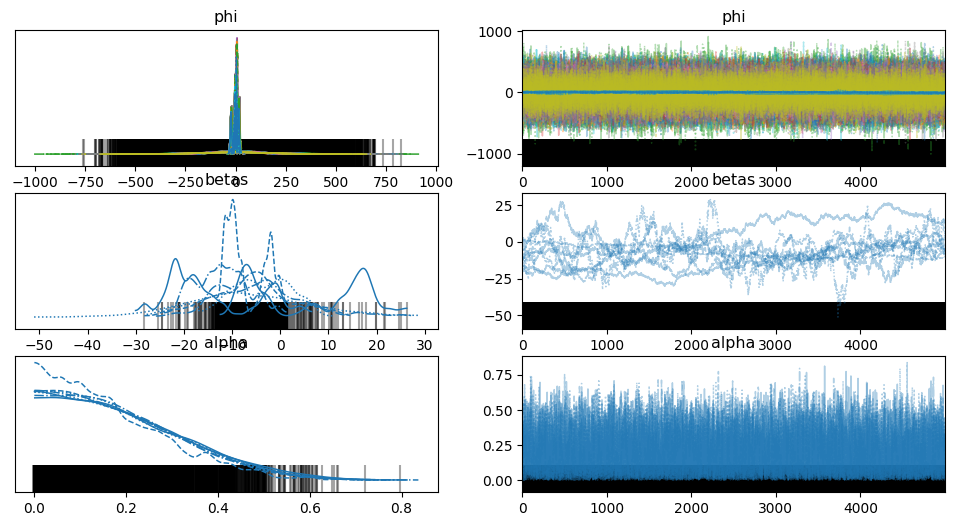

In [165]:
with simple_model:
    trace = pm.sample(5000, tune=2000, cores=8, target_accept=0.9)

print(y.mean())
az.plot_trace(trace)
az.summary(trace)

In [168]:
with simple_model:
    pm.set_data(
        {
            "adjacency_idx": prep_df.index.values,
            "total_pixels": prep_df.total_pixels.values,
        }
    )
    ppc = pm.sample_posterior_predictive(trace, predictions=True)

Sampling: [y]


ValueError: lam value too large
Apply node that caused the error: poisson_rv{0, (0,), int64, True}(RandomGeneratorSharedVariable(<Generator(PCG64) at 0x7FD9992BA5E0>), MakeVector{dtype='int64'}.0, TensorConstant{4}, Elemwise{Composite{exp((i0 + i1 + log(i2)))}}[(0, 1)].0)
Toposort index: 4
Inputs types: [RandomGeneratorType, TensorType(int64, (1,)), TensorType(int64, ()), TensorType(float64, (None,))]
Inputs shapes: ['No shapes', (1,), (), (771,)]
Inputs strides: ['No strides', (8,), (), (8,)]
Inputs values: [Generator(PCG64) at 0x7FD9992BA5E0, array([126]), array(4), 'not shown']
Outputs clients: [['output'], ['output']]

HINT: Re-running with most Aesara optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the Aesara flag 'optimizer=fast_compile'. If that does not work, Aesara optimizations can be disabled with 'optimizer=None'.
HINT: Use the Aesara flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.